In [121]:
import pandas as pd
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import json_normalize
import json

In [122]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [123]:
# load in model metrics data
LSTM_df = pd.read_csv('/content/gdrive/MyDrive/ISAN Project/Datasets/LSTM_model_metrics.csv')
XGBoost_df = pd.read_csv('/content/gdrive/MyDrive/ISAN Project/Datasets/XGBoost_model_metrics.csv')
SARIMAX_df = pd.read_csv('/content/gdrive/MyDrive/ISAN Project/Datasets/SARIMAX_model_metrics.csv')

In [124]:
# create model category column
LSTM_df['Model'] = 'LSTM'
XGBoost_df['Model'] = 'XGBoost'
SARIMAX_df['Model'] = 'SARIMAX'

# concatinate models together
df = pd.concat([LSTM_df, XGBoost_df, SARIMAX_df])
df.head()

,Ticker,Train MAE,Train MSE,Train R2,Test MAE,Test MSE,Test R2,Model,Params,Order,Seasonal Order
0,AMC,0.177402,0.080717,0.880244,0.071466,0.006633,-363.339652,LSTM,NaN,NaN,NaN
1,LIN,0.060660,0.006562,0.887299,0.114431,0.020970,-0.456223,LSTM,NaN,NaN,NaN
2,KO,0.008502,0.000118,0.831178,0.036044,0.001954,-1.998220,LSTM,NaN,NaN,NaN
3,JPM,0.032752,0.001668,0.754035,0.233358,0.057498,-7.350281,LSTM,NaN,NaN,NaN
4,MSFT,0.128200,0.024457,0.579900,0.173210,0.039309,-3.447212,LSTM,NaN,NaN,NaN


In [125]:
# creating comparison metrics for train and test
df['Total Train Error'] = df['Train MAE'] + df['Train MSE']
df['Total Test Error'] = df['Test MAE'] + df['Test MSE']
df.head()

,Ticker,Train MAE,Train MSE,Train R2,Test MAE,Test MSE,Test R2,Model,Params,Order,Seasonal Order,Total Train Error,Total Test Error
0,AMC,0.177402,0.080717,0.880244,0.071466,0.006633,-363.339652,LSTM,NaN,NaN,NaN,0.258119,0.078099
1,LIN,0.060660,0.006562,0.887299,0.114431,0.020970,-0.456223,LSTM,NaN,NaN,NaN,0.067222,0.135401
2,KO,0.008502,0.000118,0.831178,0.036044,0.001954,-1.998220,LSTM,NaN,NaN,NaN,0.008619,0.037998
3,JPM,0.032752,0.001668,0.754035,0.233358,0.057498,-7.350281,LSTM,NaN,NaN,NaN,0.034420,0.290856
4,MSFT,0.128200,0.024457,0.579900,0.173210,0.039309,-3.447212,LSTM,NaN,NaN,NaN,0.152657,0.212519


In [135]:
avg_metrics = df.groupby('Model').median(numeric_only=True)
avg_metrics[['Test MSE', 'Test MAE']]

,Test MSE,Test MAE
Model,,
LSTM,0.013126,0.095421
SARIMAX,2.906199,1.207496
XGBoost,0.001579,0.029720


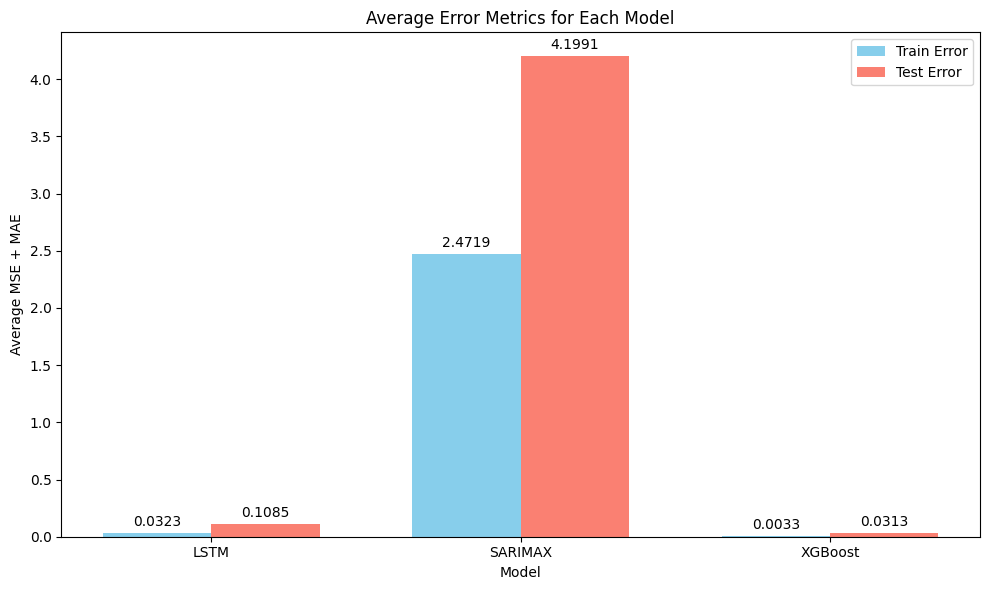

In [127]:
# Set up bar width and positions
bar_width = 0.35
x = np.arange(len(avg_metrics))

# Create plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars
train_bars = ax.bar(x - bar_width/2, avg_metrics['Total Train Error'], bar_width, label='Train Error', color='skyblue')
test_bars = ax.bar(x + bar_width/2, avg_metrics['Total Test Error'], bar_width, label='Test Error', color='salmon')

# Labels and titles
ax.set_xlabel('Model')
ax.set_ylabel('Average MSE + MAE')
ax.set_title('Average Error Metrics for Each Model')
ax.set_xticks(x)
ax.set_xticklabels(avg_metrics.index)
ax.legend()

# Optional: add value labels on bars
for bar in train_bars + test_bars:
    height = bar.get_height()
    ax.annotate(f'{height:.4f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()
plt.show()

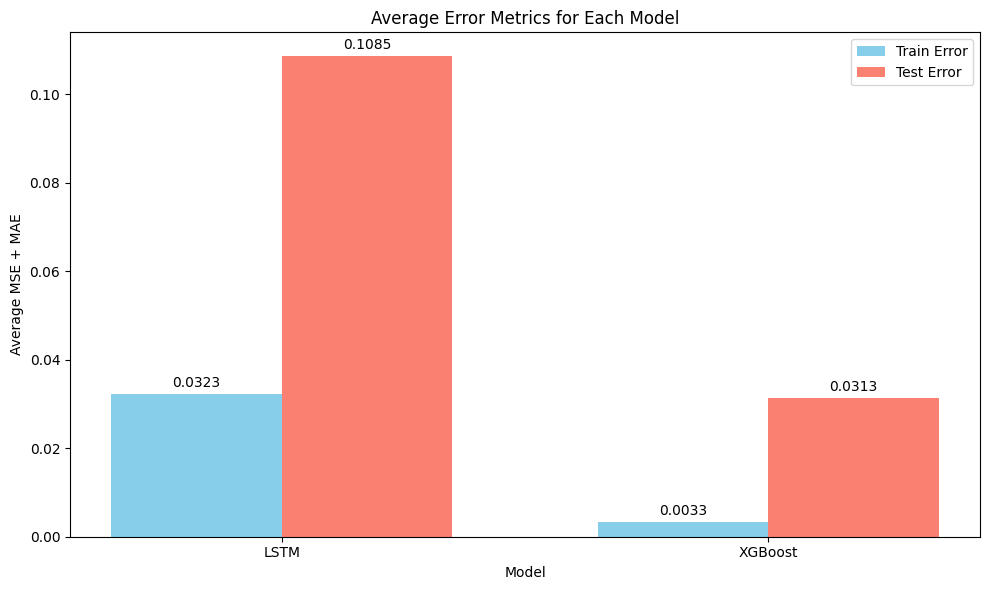

In [128]:
avg_metrics = avg_metrics[avg_metrics.index != 'SARIMAX']

# Set up bar width and positions
bar_width = 0.35
x = np.arange(len(avg_metrics))

# Create plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars
# Plot bars
train_bars = ax.bar(
    x - bar_width/2,
    avg_metrics['Total Train Error'],
    bar_width,
    label='Train Error',
    color='skyblue'
)
test_bars = ax.bar(
    x + bar_width/2,
    avg_metrics['Total Test Error'],
    bar_width,
    label='Test Error',
    color='salmon'
)

# Labels and titles
ax.set_xlabel('Model')
ax.set_ylabel('Average MSE + MAE')
ax.set_title('Average Error Metrics for Each Model')
ax.set_xticks(x)
ax.set_xticklabels(avg_metrics.index)
ax.legend()

# Optional: add value labels on bars
for bar in train_bars + test_bars:
    height = bar.get_height()
    ax.annotate(f'{height:.4f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [129]:
best_model_per_stock = df.loc[
    df['Total Test Error'] \
      .isin(
          df.groupby('Ticker')['Total Test Error'].min().values
      ),
:].sort_values('Total Test Error', ascending=False)
best_model_per_stock.head()

,Ticker,Train MAE,Train MSE,Train R2,Test MAE,Test MSE,Test R2,Model,Params,Order,Seasonal Order,Total Train Error,Total Test Error
19,META,0.002024,0.000007,0.999964,0.627896,0.459879,-5.140283,XGBoost,"{'subsample': 0.9, 'n_estimators': 200, 'min_c...",NaN,NaN,0.002031,1.087775
31,GS,0.014763,0.000356,0.986141,0.392260,0.191779,-3.751271,XGBoost,"{'subsample': 1.0, 'n_estimators': 400, 'min_c...",NaN,NaN,0.015119,0.584040
13,GE,0.016756,0.000445,0.942161,0.249972,0.071657,-2.782880,LSTM,NaN,NaN,NaN,0.017200,0.321629
3,JPM,0.001138,0.000002,0.999675,0.180725,0.039442,-4.600576,XGBoost,"{'subsample': 1.0, 'n_estimators': 500, 'min_c...",NaN,NaN,0.001140,0.220166
7,NVDA,0.001184,0.000002,0.999787,0.121844,0.021855,-1.558269,XGBoost,"{'subsample': 0.9, 'n_estimators': 500, 'min_c...",NaN,NaN,0.001186,0.143699


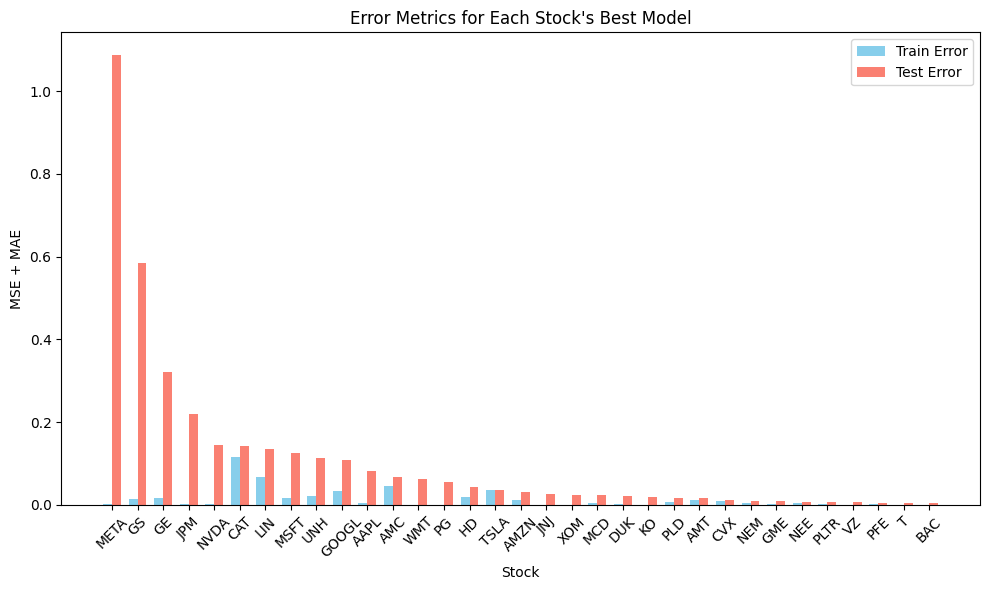

In [133]:
# Set up bar width and positions
bar_width = 0.35
x = np.arange(len(best_model_per_stock))

# Create plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars
train_bars = ax.bar(
    x - bar_width/2,
    best_model_per_stock['Total Train Error'],
    bar_width,
    label='Train Error',
    color='skyblue'
)
test_bars = ax.bar(
    x + bar_width/2,
    best_model_per_stock['Total Test Error'],
    bar_width,
    label='Test Error',
    color='salmon'
)

# Labels and titles
ax.set_xlabel('Stock')
ax.set_ylabel('MSE + MAE')
ax.set_title("Error Metrics for Each Stock's Best Model")
ax.set_xticks(x)
ax.set_xticklabels(best_model_per_stock['Ticker'])
plt.xticks(rotation=45)
ax.legend()

# Optional: add value labels on bars
for bar in train_bars + test_bars:
    height = bar.get_height()

plt.tight_layout()
plt.show()

In [131]:
XGB_best = best_model_per_stock[best_model_per_stock['Model'] == 'XGBoost']

# Expand the 'Params' column into separate columns
params = json_normalize(XGB_best['Params'] \
  .apply(lambda x: json.loads(x.replace("'", '"'))))

XGB_best = pd.concat([XGB_best['Ticker'], params], axis=1)
XGB_best.head()

,Ticker,subsample,n_estimators,min_child_weight,max_depth,learning_rate,gamma,colsample_bytree
19,META,1.0,400.0,3.0,2.0,0.05,0.0,0.6
31,GS,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,JPM,0.9,500.0,3.0,2.0,0.20,0.0,0.9
7,NVDA,0.9,300.0,4.0,8.0,0.20,0.1,0.9
4,MSFT,1.0,400.0,3.0,2.0,0.05,0.0,0.6


In [132]:
XGB_best.describe()

,subsample,n_estimators,min_child_weight,max_depth,learning_rate,gamma,colsample_bytree
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,0.906897,403.448276,3.206897,3.551724,0.103103,0.003448,0.713793
std,0.109971,77.840306,0.559292,2.010441,0.078971,0.018570,0.148141
min,0.600000,200.000000,2.000000,2.000000,0.010000,0.000000,0.600000
25%,0.900000,400.000000,3.000000,2.000000,0.050000,0.000000,0.600000
50%,0.900000,400.000000,3.000000,3.000000,0.050000,0.000000,0.600000
75%,1.000000,400.000000,4.000000,5.000000,0.200000,0.000000,0.900000
max,1.000000,500.000000,4.000000,8.000000,0.200000,0.100000,1.000000


In [134]:
best_model_per_stock

,Ticker,Train MAE,Train MSE,Train R2,Test MAE,Test MSE,Test R2,Model,Params,Order,Seasonal Order,Total Train Error,Total Test Error
19,META,0.002024,7.151298e-06,0.999964,0.627896,0.459879,-5.140283,XGBoost,"{'subsample': 0.9, 'n_estimators': 200, 'min_c...",NaN,NaN,0.002031,1.087775
31,GS,0.014763,3.559702e-04,0.986141,0.392260,0.191779,-3.751271,XGBoost,"{'subsample': 1.0, 'n_estimators': 400, 'min_c...",NaN,NaN,0.015119,0.584040
13,GE,0.016756,4.445252e-04,0.942161,0.249972,0.071657,-2.782880,LSTM,NaN,NaN,NaN,0.017200,0.321629
3,JPM,0.001138,2.221230e-06,0.999675,0.180725,0.039442,-4.600576,XGBoost,"{'subsample': 1.0, 'n_estimators': 500, 'min_c...",NaN,NaN,0.001140,0.220166
7,NVDA,0.001184,2.294167e-06,0.999787,0.121844,0.021855,-1.558269,XGBoost,"{'subsample': 0.9, 'n_estimators': 500, 'min_c...",NaN,NaN,0.001186,0.143699
15,CAT,0.102163,1.380409e-02,0.738501,0.118969,0.023483,-1.797292,LSTM,NaN,NaN,NaN,0.115967,0.142451
1,LIN,0.060660,6.562109e-03,0.887299,0.114431,0.020970,-0.456223,LSTM,NaN,NaN,NaN,0.067222,0.135401
4,MSFT,0.015950,4.004064e-04,0.993197,0.106233,0.018554,-1.116086,XGBoost,"{'subsample': 1.0, 'n_estimators': 400, 'min_c...",NaN,NaN,0.016351,0.124787
25,UNH,0.019749,6.380847e-04,0.994282,0.094574,0.018643,0.660397,XGBoost,"{'subsample': 1.0, 'n_estimators': 400, 'min_c...",NaN,NaN,0.020387,0.113217
6,GOOGL,0.032596,1.777759e-03,0.815575,0.095421,0.013126,-0.848173,LSTM,NaN,NaN,NaN,0.034373,0.108547
